In [1]:
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import os

In [2]:
DIR = 'runs'
os.listdir(DIR)

['run-classifier_2022_05_22_23_22_classifier_INS2_LR_START_0_001_seed_1-tag-acc1_1_real.csv',
 'run-classifier_2022_05_23_22_57_classifier_INS2_CFG_REALISTIC_LR_START_0_001_seed_1-tag-acc1_3_texture.csv',
 'run-classifier_2022_05_23_22_57_classifier_INS2_CFG_REALISTIC_LR_START_0_001_seed_1-tag-acc1_2_shape.csv',
 'run-classifier_2022_05_23_14_22_classifier_INS2_CFG_LR_START_0_001_seed_1-tag-acc1_2_shape.csv',
 'run-classifier_2022_05_23_22_57_classifier_INS2_CFG_REALISTIC_LR_START_0_001_seed_1-tag-acc1_1_real.csv',
 'run-classifier_2022_05_23_22_57_classifier_INS2_CFG_REALISTIC_LR_START_0_001_seed_1-tag-acc1_4_bg.csv',
 'run-classifier_2022_05_23_14_22_classifier_INS2_CFG_LR_START_0_001_seed_1-tag-acc1_4_bg.csv',
 'run-classifier_2022_05_23_14_22_classifier_INS2_CFG_LR_START_0_001_seed_1-tag-acc1_3_texture.csv',
 'run-classifier_2022_05_23_14_22_classifier_INS2_CFG_LR_START_0_001_seed_1-tag-acc1_1_real.csv']

In [3]:
out = {'real': dict(), 'shape': dict(), 'bg': dict(), 'texture': dict()}
for file in os.listdir(DIR):
    if "INS2_CFG_REALISTIC" in file:
        run = "INS2 + RealCFG"
    elif "INS2_CFG" in file:
        run = "INS2 + CFG"
    else:
        continue
        run = "INS2"
        
            
    key = file.split('_')[-1].split('.')[0]

    file_data = []
    with open(DIR + '/' + file) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        for i, line in enumerate(csv_reader):
            if i == 0:
                continue
            file_data.append(float(line[-1]))
    
    out[key][run] = file_data

out['shape'].keys()

dict_keys(['INS2 + RealCFG', 'INS2 + CFG'])

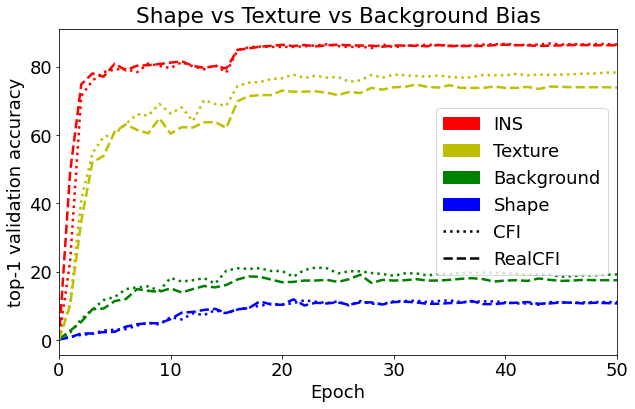

In [8]:
plt.rcParams.update({'font.size': 18})
plt.style.use('seaborn-dark-palette')

plt.figure(figsize=(10,6))
plt.title("Shape vs Texture vs Background Bias")
colors = ['r', 'b', 'g', 'y']
styles = ['--', ':', ':', 'dashed']

for i, (key, values) in enumerate(out.items()):
    for j, (run, run_values) in enumerate(values.items()):
        plt.plot(out[key][run], color=colors[i], linestyle=styles[j], linewidth=2.5)

imagenet = mpatches.Patch(color='r', label='INS')
shape = mpatches.Patch(color='b', label='Shape')
bg = mpatches.Patch(color='g', label='Background')
texture = mpatches.Patch(color='y', label='Texture')

cfg_line = Line2D([0], [0], label='CFI', color='k', linestyle=':', linewidth=2.5)
real_cfg_line = Line2D([0], [0], label='RealCFI', color='k', linestyle='--', linewidth=2.5)

plt.legend(handles=[imagenet, texture, bg, shape, cfg_line, real_cfg_line])
plt.xlim(0, 50)
plt.xlabel("Epoch")
plt.ylabel("top-1 validation accuracy")
plt.savefig('shape_text_bg_bias_v3.pdf')
plt.show()